<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/Getting_hadnson_your_first_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improving Computer Vision Accuracy using Convolutions

다른 크기의 hidden layer와 training epochs를 변경하여 효과를 실험해보도록하자.  
일단 새로운 layer를 추가하기 전의 코드를 먼저 입력하고 이후에 입력한 코드와 loss & accuracy를 비교해보도록 하자.

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras as kr

In [2]:
mnist = kr.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0
model = kr.models.Sequential([kr.layers.Flatten(),
                              kr.layers.Dense(128, activation = tf.nn.relu),
                              kr.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(training_images, training_labels, epochs = 5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6429 - accuracy: 0.7735
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3901 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3412 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3098 - accuracy: 0.8866
Epoch 5/5
313/313 [==============================] - 0s 958us/step - loss: 0.3609 - accuracy: 0.8703


어떻게 해야지 위의 정확도를 더 높일 수 있을까?  
한 가지 방법으로는 Convolutions이라고 불리는 방법을 사용하는 것이 있다.  
이 방법의 핵심 개념은 image의 크기를 좁히는 것이다.  
  
Convolution에 대한 자세한 개념은 [여기](https://www.coursera.org/learn/convolutional-neural-networks?specialization=deep-learning)에서 확인하도록 하자.  

CNN의 기본 개념은 Flatten 및 Dense layer에 진입하기전에 몇몇 convolution layer들을 추가하는 것이다. 이로부터 좀 더 좋은 정확도를 얻을 수 있다.  



In [13]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

model = kr.models.Sequential([kr.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
                              kr.layers.MaxPooling2D(2, 2),
                              kr.layers.Conv2D(64, (3,3), activation = 'relu'),
                              kr.layers.MaxPooling2D(2,2),
                              kr.layers.Flatten(),
                              kr.layers.Dense(128, activation = 'relu'),
                              kr.layers.Dense(10, activation = 'softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

정확도가 충분히 올라간 것을 볼 수 있다.  
  
정확도를 더 올리고 싶다면 epochs등을 조정해보도록 하자. 다만 epochs의 경우 overfitting이 될 경우가 있으므로 잘 확인하면서 조정하다.  
  
Convolution의 경우 3x3의 grid를 이용해서 차원을 축소하였고 activation function은 relu를 사용한 것이다.  
MaxPooling의 경우 2x2를 사용하여 차원을 절반으로 줄인 것을 알 수 있다.  
(Conv의 경우 겹쳐서 움직이는 방면, MaxPooling은 점프한다. - 확실하진 않지만 stride의 개념을 알아야 할 것 같다. 추후에 확인해보도록 하자.)

# Visualizing the Convolutions and Poolings

여기서는 Convolutions을 그래픽적으로 확인해보도록 한다.  

다음 test에서 모두 동일하게 9로 신바을 나타내는 것에 대하여 Convolution을 실행한 결과를 유심히 보도록 하자. 공통적인 특성을 발견할 수 있을 것이다.

In [14]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


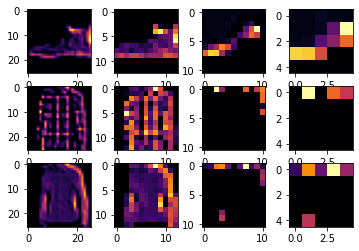

In [19]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)

First_image = 0
Second_image = 7
Third_image = 26
Convolution_Number = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0, 4) :
  f1 = activation_model.predict(test_images[First_image].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, Convolution_Number], cmap = 'inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[Second_image].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, Convolution_Number], cmap = 'inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[Third_image].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, Convolution_Number], cmap = 'inferno')
  axarr[2,x].grid(False)